# Proyek Analisis Data: Bike-sharing-dataset.zip
- **Nama:** Amril Hakim Sihotang
- **Email:** amrilhakim99@gmail.com
- **ID Dicoding:** amrilhs

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Apa faktor-faktor utama yang mempengaruhi jumlah pengguna sepeda setiap hari?
- Pertanyaan 2 : Bagaimana pengaruh kondisi cuaca terhadap jumlah pengguna *casual* dan terdaftar setiap hari?

- Pertanyaan 3 : Bagaimana variasi penggunaan sepeda selama hari kerja dan akhir pekan pada jam-jam tertentu dalam sehari?

- Pertanyaan 4 : Bagaimana pengaruh suhu atau kelembaban terhadap jumlah pengguna sepeda pada jam-jam sibuk (misalnya, jam pergi dan pulang kerja)?


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
from google.colab import files
from google.colab import drive

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

Mengaitkan Google Drive dengan notebook Colab


In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


menggunakan Bike-sharing-dataset.zip<br>
source download: https://drive.google.com/file/d/1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ/view

In [3]:
files.upload();

Saving Bike-sharing-dataset.zip to Bike-sharing-dataset.zip


Ekstrak file yang sudah di download dan hasil ekstrak diletakkan di folder files

In [4]:
!unzip /content/Bike-sharing-dataset.zip -d /content/files

Archive:  /content/Bike-sharing-dataset.zip
  inflating: /content/files/Readme.txt  
  inflating: /content/files/day.csv  
  inflating: /content/files/hour.csv  


Load dataset day.csv

In [5]:
df_day = pd.read_csv('/content/files/day.csv')
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Load dataset hour.csv

In [6]:
df_hour = pd.read_csv('/content/files/hour.csv')
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Keterangan kedua dataset:<br>
Tabel Hour.csv dan day.csv memiliki beberapa kolom yang sama<br>
kecuali hr yang tidak tersedia di day.csv
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Assessing Data

Melihat dataset days.csv untuk memahami struktur data dan melihat masalah pada dataset tersebut

In [7]:
# Melihat info df_day
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
# Ringkasan statistik df_day
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
# Periksa value missing pada df_day
print('Total missing value untuk df_day: ',df_day.isnull().sum().sum(),'records\n')

# Memeriksa baris yang duplikat
print('Ditemukan data duplikat untuk df_day: ',df_day.duplicated().sum(),'records')

Total missing value untuk df_day:  0 records

Ditemukan data duplikat untuk df_day:  0 records


In [10]:
# Dan menampilkan total kolom untuk df_day.
print('Total kolom df_day sebanyak',len(df_day.columns),'kolom\n')

# Menampilkan kolom-kolom df_day
df_day.columns

Total kolom df_day sebanyak 16 kolom



Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Melihat dataset hours.csv untuk memahami struktur data dan melihat masalah pada dataset tersebut

In [11]:
# Melihat info df_hour
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
# Ringkasan statistik df_hour
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [13]:
# Periksa value missing pada df_hour
print('Total missing value untuk df_hour: ',df_day.isnull().sum().sum(),'records\n')
# Memeriksa baris yang duplikat
print('Ditemukan data duplikat untuk df_hour: ',df_hour.duplicated().sum(),'records')

Total missing value untuk df_hour:  0 records

Ditemukan data duplikat untuk df_hour:  0 records


In [14]:
# Menampilkan total kolom untuk df_hour.
print('Total kolom df_hour sebanyak ',len(df_hour.columns),'kolom\n')
# Menampilkan kolom-kolom df_hour
df_hour.columns

Total kolom df_hour sebanyak  17 kolom



Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Cleaning Data

Menghapus beberapa kolom df_days yang tidak diperlukan untuk mensupport pertanyaan 1

In [15]:
# Hapus kolom yang tidak diperlukan
columns_to_drop_1 = ['instant', 'dteday', 'casual', 'registered']
df_day_cleaned_1 = df_day.drop(columns = columns_to_drop_1)

# Hasil cleaning untuk df_day_cleaned_1
df_day_cleaned_1

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


*Insight* yang di dapat dari dataset df_day_cleaned_1(pertanyaan 1) adalah:


*  Data ini menunjukkan faktor-faktor yang mempengaruhi jumlah pengguna sepeda(cnt)
*  Kolom-kolom seperti *season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, dan windspeed* dapat dianalisis untuk melihat bagaimana masing-masing faktor ini mempengaruhi cnt.


Menghapus beberapa kolom df_day yang tidak diperlukan untuk mensupport pertanyaan 2

In [16]:
# Hapus kolom yang tidak diperlukan
columns_to_drop_2 = ['instant', 'dteday', 'cnt']
df_day_cleaned_2 = df_day.drop(columns = columns_to_drop_2)

# Hasil cleaning untuk df_day_cleaned_2
df_day_cleaned_2

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432


*Insight* yang di dapat dari dataset df_day_cleaned_2(pertanyaan 2) adalah:


*   Data ini menunjukkan pengaruh kondisi cuaca dan faktor lainnya terhadap jumlah pengguna casual *(casual)* dan pengguna terdaftar *(registered)*
*   Kolom-kolom seperti *season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, dan windspeed* dapat dianalisis untuk melihat bagaimana mereka mempengaruhi jumlah pengguna casual dan terdaftar.



Menghapus beberapa kolom df_hour yang tidak diperlukan untuk mensupport pertanyaan 3

In [17]:
# Hapus kolom yang tidak diperlukan
columns_to_drop_3 = ['instant', 'season', 'yr', 'mnth',
                     'holiday','weathersit','temp',
                     'atemp','hum','windspeed']
df_hour_cleaned_3 = df_hour.drop(columns = columns_to_drop_3)

# Hasil cleaning untuk df_hour_cleaned_3
df_hour_cleaned_3

,dteday,hr,weekday,workingday,casual,registered,cnt
0,2011-01-01,0,6,0,3,13,16
1,2011-01-01,1,6,0,8,32,40
2,2011-01-01,2,6,0,5,27,32
3,2011-01-01,3,6,0,3,10,13
4,2011-01-01,4,6,0,0,1,1
...,...,...,...,...,...,...,...
17374,2012-12-31,19,1,1,11,108,119
17375,2012-12-31,20,1,1,8,81,89
17376,2012-12-31,21,1,1,7,83,90
17377,2012-12-31,22,1,1,13,48,61


*Insight* yang di dapat dari dataset df_hour_cleaned_3(pertanyaan 3) adalah:


*   Dengan data ini, dapat dianalisis distribusi penggunaan sepeda pada jam-jam tertentu, membandingkan hari kerja dan akhir pekan.
*   Dapat diidentifikasi tren tertentu seperti jam-jam puncak penggunaan pada hari kerja (misalnya, jam pergi dan pulang kerja) dan membandingkan dengan pola penggunaan pada akhir pekan.




Menghapus beberapa kolom df_hour yang tidak diperlukan untuk mensupport pertanyaan 4

In [18]:
# Hapus kolom yang tidak diperlukan
columns_to_drop_4 = ['instant', 'dteday', 'season', 'yr', 'mnth',
                     'holiday', 'weekday', 'workingday',
                     'weathersit', 'windspeed']
df_hour_cleaned_4 = df_hour.drop(columns = columns_to_drop_4)

# Hasil cleaning untuk df_hour_cleaned_4
df_hour_cleaned_4

,hr,temp,atemp,hum,casual,registered,cnt
0,0,0.24,0.2879,0.81,3,13,16
1,1,0.22,0.2727,0.80,8,32,40
2,2,0.22,0.2727,0.80,5,27,32
3,3,0.24,0.2879,0.75,3,10,13
4,4,0.24,0.2879,0.75,0,1,1
...,...,...,...,...,...,...,...
17374,19,0.26,0.2576,0.60,11,108,119
17375,20,0.26,0.2576,0.60,8,81,89
17376,21,0.26,0.2576,0.60,7,83,90
17377,22,0.26,0.2727,0.56,13,48,61


Insight yang di dapat dari dataset df_hour_cleaned_4(pertanyaan 4) adalah:


*   Data ini memungkinkan dilakukannya analisis tentang bagaimana perubahan suhu mempengaruhi jumlah pengguna sepeda, terutama pada jam-jam sibuk.
*   Dampak kelembaban terhadap jumlah pengguna, juga dapat dilihat melalui data ini, apakah kelembaban tinggi atau rendah mempengaruhi preferensi bersepeda?



## Exploratory Data Analysis (EDA)

### Explore ...

In [19]:
# Sebelum lebih lanjut dalam hal proses data, tahapan selanjutnya adalah
# mengeksplor data untuk melihat keadaan data primer hasil cleaning seperti:

df_day_cleaned_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [30]:
# Melakukan Grouping dan Aggregation untuk df_day_cleaned_1:
# Mengelompokkan data berdasarkan season dan weathersit.
# Menghitung rata-rata(mean) dan total(sum) dari cnt
# Menghitung rata-rata (mean) dari temp, atemp, hum, dan windspeed.
groupby_1 = df_day_cleaned_1.groupby(['season', 'weathersit']).agg({
    'cnt': ['mean', 'sum'],
    'temp': 'mean',
    'atemp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean'
}).reset_index()
# Merename/mengatur nama kolom hasil agregasi agar lebih jelas
groupby_1.columns = ['season', 'weathersit',
                     'cnt_mean', 'cnt_sum', 'temp_mean',
                     'atemp_mean', 'hum_mean', 'windspeed_mean']
# Tampilkan data
groupby_1

,season,weathersit,cnt_mean,cnt_sum,temp_mean,atemp_mean,hum_mean,windspeed_mean
0,1,1,2811.135135,312036,0.301221,0.298793,0.514689,0.225780
1,1,2,2357.166667,155573,0.293678,0.296288,0.696331,0.191023
2,1,3,934.750000,3739,0.268523,0.255117,0.604271,0.290517
3,2,1,5548.548673,626986,0.563402,0.537837,0.552617,0.202740
4,2,2,4236.705882,288096,0.520739,0.498359,0.739276,0.200482
5,2,3,1169.000000,3507,0.365278,0.357524,0.880694,0.301000
6,3,1,5878.257353,799443,0.720862,0.667923,0.589422,0.170204
7,3,2,5222.479167,250679,0.674583,0.631390,0.735920,0.174148
8,3,3,2751.750000,11007,0.592228,0.541176,0.902255,0.211753
9,4,1,5043.563107,519487,0.404918,0.402340,0.603229,0.164738


Insight yang didapatkan:<br>
1.   Pengaruh musim dan cuaca:
      
 - Rata-rata jumlah pengguna sepeda per hari (cnt_mean) atau total jumlah pengguna (cnt_sum) dapat dianalisis berdasarkan musim (season) atau situasi cuaca (weathersit).
 -  Misalnya, dapat dilihat apakah musim tertentu dan kondisi cuaca tertentu memiliki jumlah pengguna sepeda yang lebih tinggi atau lebih rendah.


2.   Kondisi Cuaca:

  - Rata-rata suhu (temp_mean dan atemp_mean), kelembaban (hum_mean), dan kecepatan angin (windspeed_mean) untuk setiap kombinasi musim dan situasi cuaca.
  -  Insight ini dapat membantu memahami kondisi cuaca seperti apa yang lebih mendukung penggunaan sepeda.






In [21]:
# mengeksplor data untuk melihat keadaan data primer hasil cleaning seperti:

df_day_cleaned_2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518


In [22]:
# Melakukan Grouping dan Aggregation untuk df_day_cleaned_2:
# Mengelompokkan data berdasarkan weathersit.
# Menghitung rata-rata (mean) dan total (sum) dari casual dan registered.
# Menghitung rata-rata (mean) dari temp, atemp, hum, dan windspeed.
groupby_2 = df_day_cleaned_2.groupby(['weathersit']).agg({
    'casual': ['mean', 'sum'],
    'registered': ['mean', 'sum'],
    'temp': 'mean',
    'atemp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean'
}).reset_index()

# Merename/mengatur nama kolom hasil agregasi agar lebih jelas
groupby_2.columns = ['weathersit', 'casual_mean', 'casual_sum',
                     'registered_mean', 'registered_sum', 'temp_mean',
                     'atemp_mean', 'hum_mean', 'windspeed_mean']

# Tampilkan data
groupby_2

,weathersit,casual_mean,casual_sum,registered_mean,registered_sum,temp_mean,atemp_mean,hum_mean,windspeed_mean
0,1,964.030238,446346,3912.755940,1811606,0.511541,0.488596,0.565594,0.190253
1,2,687.352227,169776,3348.510121,827082,0.470366,0.452868,0.725887,0.186431
2,3,185.476190,3895,1617.809524,33974,0.433440,0.413064,0.848872,0.243336


Insight yang didapatkan:


1.   Pengaruh Cuaca terhadap Pengguna Casual dan Terdaftar:
  - Rata-rata dan total jumlah pengguna casual (casual_mean dan casual_sum) dan terdaftar (registered_mean dan registered_sum) dapat dianalisis berdasarkan situasi cuaca (weathersit).
  - Misalnya, dapat dilihat apakah pengguna casual lebih banyak atau lebih sedikit dibandingkan pengguna terdaftar dalam kondisi cuaca tertentu.

2.   Kondisi Cuaca:
  - Rata-rata suhu (temp_mean dan atemp_mean), kelembaban (hum_mean), dan kecepatan angin (windspeed_mean) untuk setiap situasi cuaca.
  - Insight ini dapat membantu memahami kondisi cuaca seperti apa yang lebih mendukung atau menghambat penggunaan sepeda oleh pengguna casual dan terdaftar.

In [23]:
# Melakukan Grouping dan Aggregation untuk df_hour_cleaned_3:
# Data dikelompokkan berdasarkan hr, weekday, dan workingday.
# Penghitungan total untuk kolom casual, registered, dan cnt.

groupby_3 = df_hour_cleaned_3.groupby(['hr', 'weekday', 'workingday']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()

# Merename/mengatur nama kolom hasil agregasi agar lebih jelas
groupby_3.columns = ['hours', 'weekday','workingday', 'casual_sum',
                     'registered_sum', 'count_sum']

# Tampilkan data
groupby_3

,hours,weekday,workingday,casual_sum,registered_sum,count_sum
0,0,0,0,1896,7879,9775
1,0,1,0,262,611,873
2,0,1,1,727,1971,2698
3,0,2,0,3,10,13
4,0,2,1,580,2197,2777
...,...,...,...,...,...,...
282,23,4,0,10,47,57
283,23,4,1,1376,8629,10005
284,23,5,0,14,123,137
285,23,5,1,2013,9832,11845


Insight yang didapatkan:<br>

1.   Perbedaan Hari Kerja dan Akhir Pekan:
  - Pada hari kerja (workingday = 1), penggunaan sepeda cenderung lebih tinggi pada jam-jam sibuk seperti pagi (sekitar jam 7-9) dan sore (sekitar jam 5-7).
  - Pada akhir pekan (workingday = 0), penggunaan sepeda lebih merata sepanjang hari tanpa puncak yang jelas pada jam-jam tertentu.
2.  Distribusi Pengguna Terdaftar vs Tidak Terdaftar:
  - Pengguna terdaftar (registered) cenderung menggunakan sepeda lebih sering selama hari kerja, menunjukkan bahwa mereka mungkin menggunakan sepeda untuk pergi dan pulang kerja.
  -  Pengguna tidak terdaftar (casual) menunjukkan pola penggunaan yang lebih tinggi pada akhir pekan, yang mungkin menunjukkan penggunaan rekreasi.


In [24]:
# Defisi rush hours (misal 7-9 AM dan 5-7 PM)
rush_hours = [7, 8, 9, 17, 18, 19]

# Filter data untuk rush hours
rush_hour_df4 =df_hour_cleaned_4[df_hour_cleaned_4['hr'].isin(rush_hours)]

# Data dikelompokkan berdasarkan hr, temp, dan hum.
groupby_4 = rush_hour_df4.groupby(['hr', 'temp', 'hum']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()

groupby_4.columns = ['hours', 'temp','hum', 'casual_sum',
                     'registered_sum', 'count_sum']

# Tampilkan data
groupby_4

,hours,temp,hum,casual_sum,registered_sum,count_sum
0,7,0.02,0.44,1,159,160
1,7,0.02,0.48,5,79,84
2,7,0.06,0.49,4,95,99
3,7,0.08,0.53,1,23,24
4,7,0.08,0.58,1,1,2
...,...,...,...,...,...,...
2275,19,0.88,0.39,212,790,1002
2276,19,0.90,0.42,22,219,241
2277,19,0.90,0.45,80,534,614
2278,19,0.90,0.47,60,303,363


Insight yang didapatkan: <br>


1.   Pengaruh Suhu:
   - Suhu yang lebih nyaman (tidak terlalu panas atau terlalu dingin) cenderung meningkatkan jumlah pengguna sepeda. Misalnya, suhu antara 0.22 hingga 0.26 (berdasarkan skala suhu yang ada dalam dataset) menunjukkan tingkat penggunaan yang lebih tinggi.
   - Pada suhu ekstrem, baik panas maupun dingin, jumlah pengguna sepeda cenderung menurun.
2.   Pengaruh Kelembaban:
   - Kelembaban yang moderat cenderung lebih disukai oleh pengguna sepeda. Misalnya, kelembaban sekitar 0.60 hingga 0.75 menunjukkan jumlah pengguna yang lebih tinggi.
   - Kelembaban yang sangat tinggi atau sangat rendah bisa mengurangi kenyamanan dan menurunkan jumlah pengguna sepeda.




## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa faktor-faktor utama yang mempengaruhi jumlah pengguna sepeda setiap hari?

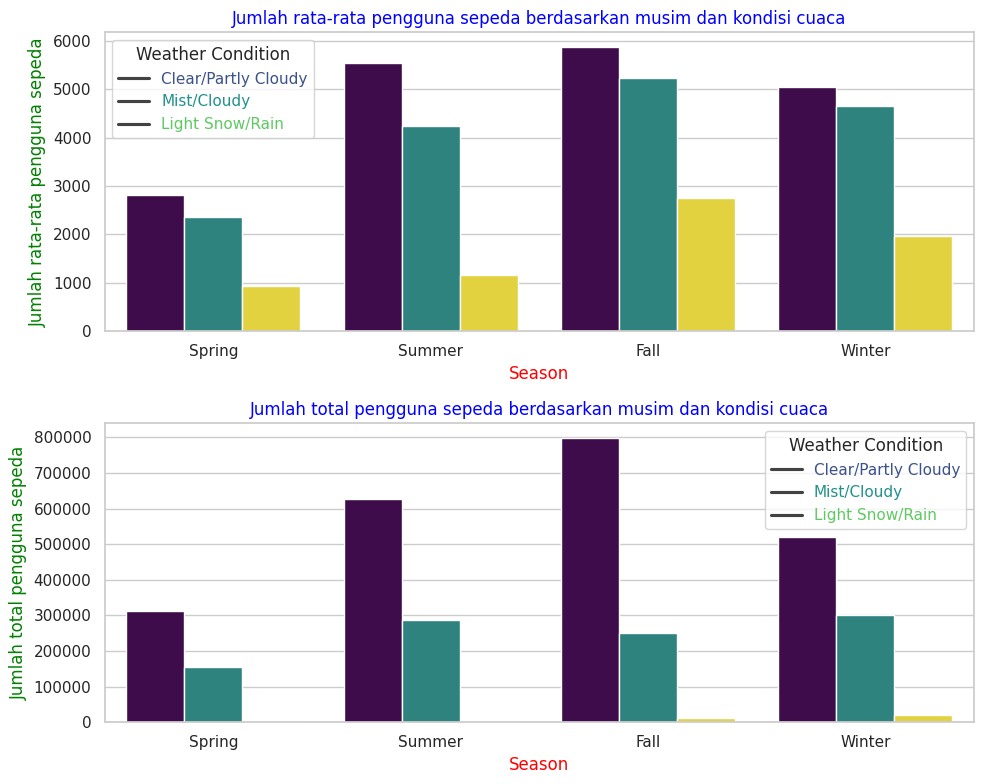

In [25]:
# Mengatur style untuk plot
sns.set(style="whitegrid")

# Membuat grafik dengan subplot untuk jumlah rata-rata berdasarkan musim dan kondisi cuaca
plt.figure(figsize=(10, 8))

# Subplot pertama untuk jumlah rata-rata pengguna sepeda berdasarkan musim dan kondisi cuaca
plt.subplot(2, 1, 1)
bar1 = sns.barplot(x='season', y='cnt_mean', hue='weathersit', data=groupby_1, palette='viridis')
plt.title('Total pengguna sepeda berdasarkan musim dan kondisi cuaca')
plt.xlabel('Season')
plt.ylabel('Jumlah rata-rata pengguna sepeda')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
legend1 = plt.legend(title='Weather Condition', labels=['Clear/Partly Cloudy', 'Mist/Cloudy', 'Light Snow/Rain'])

# Mengatur warna label untuk subplot pertama
title_obj1 = plt.title('Jumlah rata-rata pengguna sepeda berdasarkan musim dan kondisi cuaca')
title_obj1.set_color('blue')
xlabel_obj1 = plt.xlabel('Season')
xlabel_obj1.set_color('red')
ylabel_obj1 = plt.ylabel('Jumlah rata-rata pengguna sepeda')
ylabel_obj1.set_color('green')

# Mengubah warna teks di dalam legend untuk subplot pertama
for text, color in zip(legend1.get_texts(), sns.color_palette('viridis', 3)):
    text.set_color(color)

# Subplot kedua untuk jumlah total pengguna sepeda berdasarkan musim dan kondisi cuaca
plt.subplot(2, 1, 2)
bar2 = sns.barplot(x='season', y='cnt_sum', hue='weathersit', data=groupby_1, palette='viridis')
plt.title('Total pengguna sepeda berdasarkan musim dan kondisi cuaca')
plt.xlabel('Season')
plt.ylabel('Jumlah total pengguna sepeda')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
legend2 = plt.legend(title='Weather Condition', labels=['Clear/Partly Cloudy', 'Mist/Cloudy', 'Light Snow/Rain'])

# Mengatur warna label untuk subplot kedua
title_obj2 = plt.title('Jumlah total pengguna sepeda berdasarkan musim dan kondisi cuaca')
title_obj2.set_color('blue')
xlabel_obj2 = plt.xlabel('Season')
xlabel_obj2.set_color('red')
ylabel_obj2 = plt.ylabel('Jumlah total pengguna sepeda')
ylabel_obj2.set_color('green')

# Mengubah warna teks di dalam legend untuk subplot kedua
for text, color in zip(legend2.get_texts(), sns.color_palette('viridis', 3)):
    text.set_color(color)

plt.tight_layout()
plt.show()


Berdasarkan kedua grafik diatas, faktor utama yang mempengaruhi jumlah pengguna sepeda setiap hari, yaitu:<br>

Musim: Jumlah pengguna sepeda per hari lebih tinggi di musim gugur dibandingkan dengan musim semi. <br>Hal ini kemungkinan disebabkan oleh cuaca yang lebih hangat dan cerah di musim tersebut, sehingga orang-orang lebih tertarik untuk bersepeda.<br>
Cuaca: Cuaca juga dapat memengaruhi jumlah pengguna sepeda per hari. Misalnya, jika hujan atau badai, orang-orang mungkin lebih memilih untuk menggunakan kendaraan lain daripada bersepeda.

### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap jumlah pengguna casual dan terdaftar setiap hari?

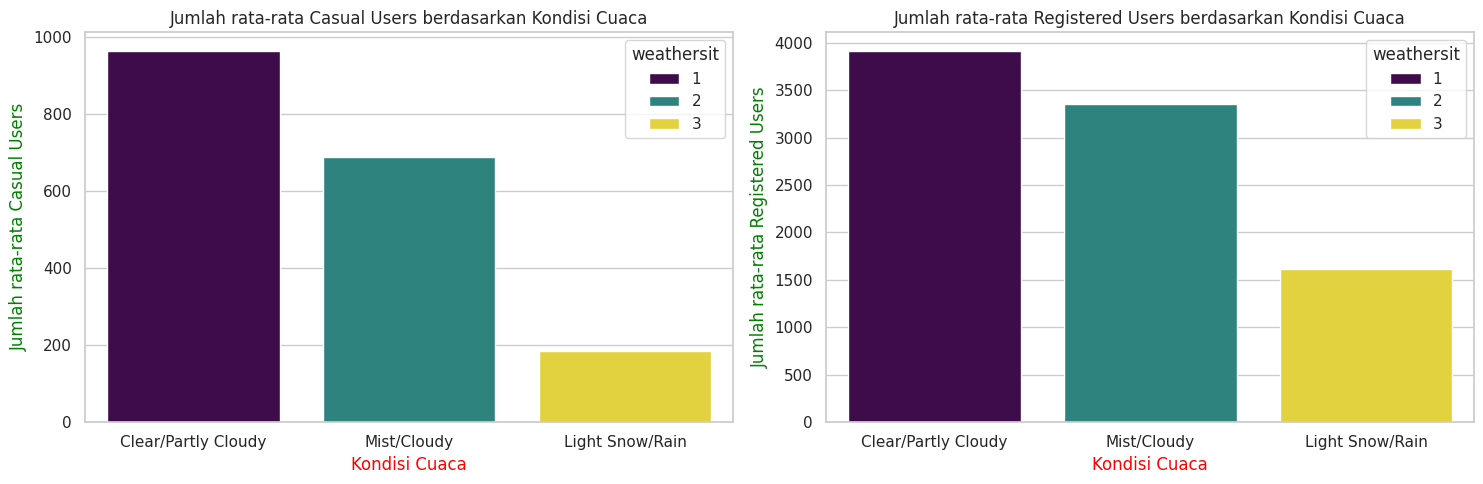

In [26]:
# Mengatur style untuk plot
sns.set(style="whitegrid")

# Buat grafik dengan dua subplots untuk casual dan registered users
plt.figure(figsize=(15, 5))

# Bar plot untuk casual users
plt.subplot(1, 2, 1)
sns.barplot(x='weathersit', y='casual_mean', hue='weathersit', data=groupby_2, palette='viridis')
plt.title('Jumlah rata-rata Casual Users berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah rata-rata Casual Users')
plt.xticks([0, 1, 2], ['Clear/Partly Cloudy', 'Mist/Cloudy', 'Light Snow/Rain'])
xlabel_obj1 = plt.xlabel('Kondisi Cuaca')
xlabel_obj1.set_color('red')
ylabel_obj2 = plt.ylabel('Jumlah rata-rata Casual Users')
ylabel_obj2.set_color('green')
# Bar plot untuk registered users
plt.subplot(1, 2, 2)
sns.barplot(x='weathersit', y='registered_mean', hue='weathersit', data=groupby_2, palette='viridis')
plt.title('Jumlah rata-rata Registered Users berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah rata-rata Registered Users')
plt.xticks([0, 1, 2], ['Clear/Partly Cloudy', 'Mist/Cloudy', 'Light Snow/Rain'])
xlabel_obj2 = plt.xlabel('Kondisi Cuaca')
xlabel_obj2.set_color('red')
ylabel_obj2 = plt.ylabel('Jumlah rata-rata Registered Users')
ylabel_obj2.set_color('green')
plt.tight_layout()
plt.show()


Bedasarkan kedua grafik diatas,Terlihat bahwa kondisi cuaca memiliki pengaruh yang signifikan terhadap jumlah pengguna casual dan terdaftar setiap hari.<br>


1.   Pengguna Casual

    * Clear/Partly Cloudy: Jumlah pengguna casual paling tinggi pada kondisi cuaca ini. Hal ini kemungkinan besar karena orang-orang lebih suka menghabiskan waktu di luar ruangan saat cuaca cerah dan berawan sebagian.
  
   * Mist/Cloudy: Jumlah pengguna casual lebih rendah dibandingkan dengan cuaca cerah/berawan sebagian.
    * Light Snow/Rain: Jumlah pengguna casual paling rendah pada kondisi cuaca ini. Hal ini kemungkinan besar karena orang-orang enggan keluar rumah saat hujan turun.



2.   Pengguna Terdaftar
    * Clear/Partly Cloudy: Jumlah pengguna terdaftar lebih rendah dibandingkan dengan cuaca berkabut/berawan.
    * Mist/Cloudy: Jumlah pengguna terdaftar paling tinggi pada kondisi cuaca ini. Hal ini kemungkinan besar karena orang-orang yang sudah terdaftar menggunakan platform tersebut lebih cenderung untuk tetap menggunakannya meskipun cuaca tidak ideal.
    * Light Snow/Rain: Jumlah pengguna terdaftar turun dibandingkan dengan cuaca berkabut/berawan.

### Pertanyaan 3: Bagaimana variasi penggunaan sepeda selama hari kerja dan akhir pekan pada jam-jam tertentu dalam sehari?

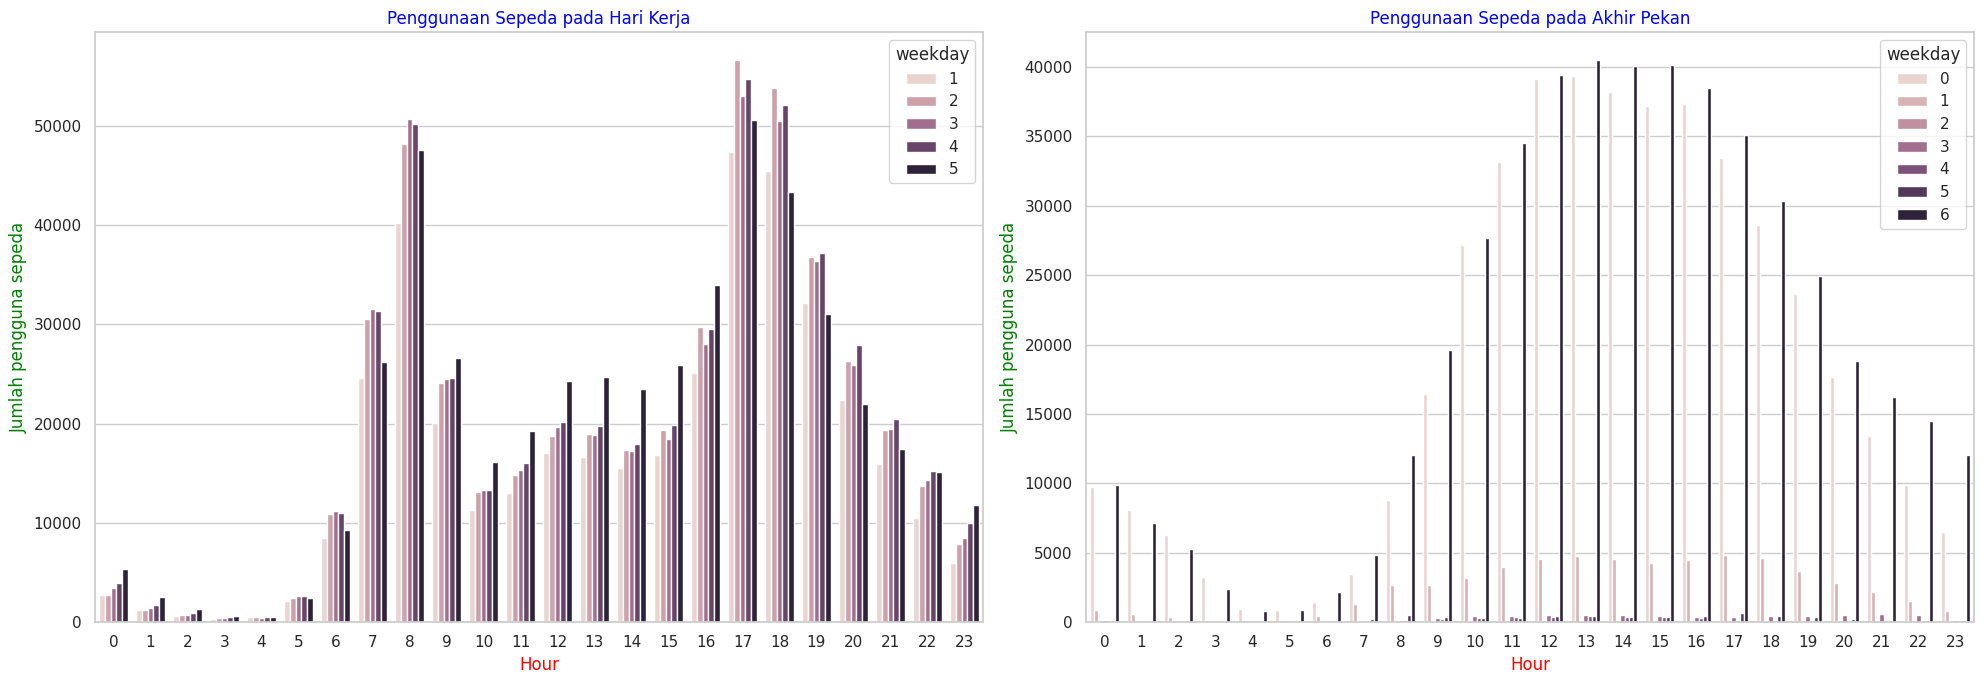

In [27]:
workingday_data = groupby_3[groupby_3['workingday'] == 1]
weekend_data = groupby_3[groupby_3['workingday'] == 0]

plt.figure(figsize=(20, 7))

# Hari kerja
plt.subplot(1, 2, 1)
sns.barplot(data=workingday_data, x='hours', y='count_sum', hue='weekday')
plt.title('Penggunaan Sepeda pada Hari Kerja')
plt.xlabel('Hour')
plt.ylabel('Jumlah pengguna sepeda')
title_obj1 = plt.title('Penggunaan Sepeda pada Hari Kerja')
title_obj1.set_color('blue')
xlabel_obj1 = plt.xlabel('Hour')
xlabel_obj1.set_color('red')
ylabel_obj1 = plt.ylabel('Jumlah pengguna sepeda')
ylabel_obj1.set_color('green')

# Akhir pekan
plt.subplot(1, 2, 2)
sns.barplot(data=weekend_data, x='hours', y='count_sum', hue='weekday')
plt.title('Penggunaan Sepeda pada Akhir Pekan')
plt.xlabel('Hour')
plt.ylabel('Jumlah pengguna sepeda')
title_obj2 = plt.title('Penggunaan Sepeda pada Akhir Pekan')
title_obj2.set_color('blue')
xlabel_obj2 = plt.xlabel('Hour')
xlabel_obj2.set_color('red')
ylabel_obj2 = plt.ylabel('Jumlah pengguna sepeda')
ylabel_obj2.set_color('green')

plt.tight_layout()
plt.show()

Bedasarkan kedua grafik diatas terdapat beberapa kesimpulan mengenai variasi penggunaan sepeda selama hari kerja dan akhir pekan pada jam-jam tertentu dalam sehari

1. Hari Kerja:

 * Peningkatan penggunaan sepeda di pagi hari: Terjadi lonjakan penggunaan sepeda di pagi hari antara jam 6 hingga 8. Hal ini kemungkinan besar disebabkan oleh aktivitas komutasi, seperti pergi ke sekolah atau kantor.
 * Penurunan penggunaan sepeda di siang hari: Penggunaan sepeda menurun di siang hari, antara jam 10 hingga 14. Hal ini bisa disebabkan oleh cuaca panas atau aktivitas lain yang tidak memungkinkan penggunaan sepeda.
 * Peningkatan penggunaan sepeda di sore hari: Penggunaan sepeda kembali meningkat di sore hari, antara jam 15 hingga 18. Hal ini kemungkinan besar disebabkan oleh aktivitas pulang ke rumah dari sekolah atau kantor.

2. Akhir Pekan:

  * Peningkatan penggunaan sepeda di pagi hari: Penggunaan sepeda di akhir pekan lebih tinggi dibandingkan hari kerja, terutama di pagi hari antara jam 6 hingga 8. Hal ini kemungkinan besar disebabkan oleh aktivitas rekreasi atau olahraga.
  * Penggunaan sepeda yang relatif konsisten sepanjang hari: Penggunaan sepeda di akhir pekan relatif konsisten sepanjang hari, dengan sedikit penurunan di siang hari. Hal ini menunjukkan bahwa bersepeda merupakan aktivitas yang populer untuk menghabiskan waktu luang di akhir pekan.
  * Penurunan penggunaan sepeda di malam hari: Penggunaan sepeda menurun di malam hari, baik pada hari kerja maupun akhir pekan. Hal ini kemungkinan besar disebabkan oleh faktor keamanan, seperti kurangnya penerangan jalan.

### Pertanyaan 4:  Bagaimana pengaruh suhu atau kelembaban terhadap jumlah pengguna sepeda pada jam-jam sibuk (misalnya, jam pergi dan pulang kerja)?

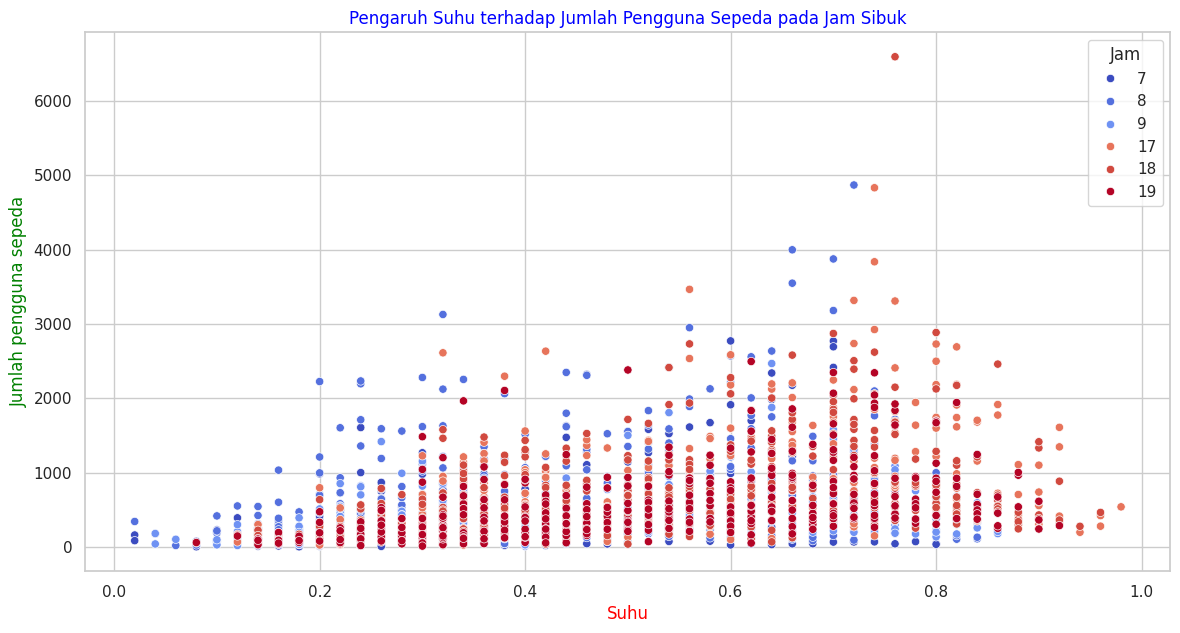

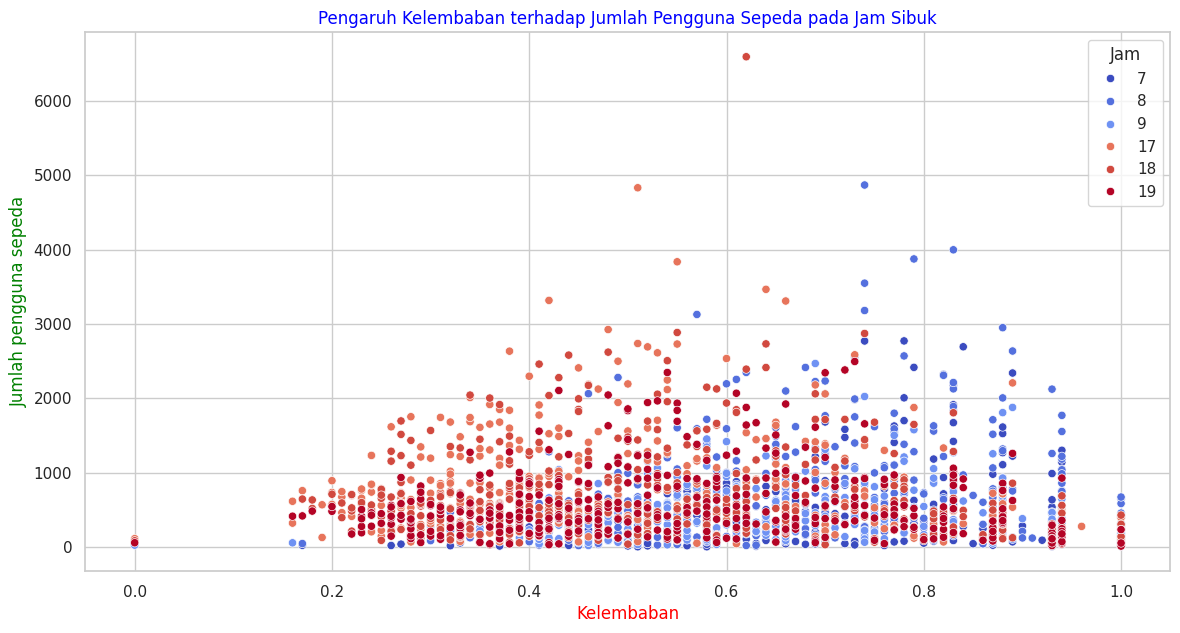

In [28]:
# Visualisasi pengaruh suhu terhadap jumlah pengguna sepeda
plt.figure(figsize=(14, 7))
sns.scatterplot(data=groupby_4, x='temp', y='count_sum', hue='hours', palette='coolwarm')
plt.title('Pengaruh Suhu terhadap Jumlah Pengguna Sepeda pada Jam Sibuk')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.legend(title='Jam')
title_obj1 = plt.title('Pengaruh Suhu terhadap Jumlah Pengguna Sepeda pada Jam Sibuk')
title_obj1.set_color('blue')
xlabel_obj1 = plt.xlabel('Suhu')
xlabel_obj1.set_color('red')
ylabel_obj1 = plt.ylabel('Jumlah pengguna sepeda')
ylabel_obj1.set_color('green')
plt.show()

# Visualisasi pengaruh kelembaban terhadap jumlah pengguna sepeda
plt.figure(figsize=(14, 7))
sns.scatterplot(data=groupby_4, x='hum', y='count_sum', hue='hours', palette='coolwarm')
plt.title('Pengaruh Kelembaban terhadap Jumlah Pengguna Sepeda pada Jam Sibuk')
plt.xlabel('Kelembaban')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.legend(title='Jam')
title_obj2 = plt.title('Pengaruh Kelembaban terhadap Jumlah Pengguna Sepeda pada Jam Sibuk')
title_obj2.set_color('blue')
xlabel_obj2 = plt.xlabel('Kelembaban')
xlabel_obj2.set_color('red')
ylabel_obj2 = plt.ylabel('Jumlah pengguna sepeda')
ylabel_obj2.set_color('green')
plt.show()

Berdasarkan kedua grafik diatas


*   Pengaruh suhu(temp)
    * Grafik pertama menunjukkan hubungan antara suhu, jumlah pengguna sepeda, dan jam sibuk. Secara umum, jumlah pengguna sepeda semakin banyak seiring dengan meningkatnya suhu. Hal ini dapat dilihat dari titik sebaran berwarna yang menunjukkan jumlah pengguna sepeda di setiap jam sibuk.
*   Pengaruh kelembaban(hum)
    * Grafik kedua menunjukkan perbedaan penggunaan sepeda di Jam Sibuk,
     Terdapat perbedaan yang signifikan dalam penggunaan sepeda pada jam sibuk pagi (7-9 pagi) dan sore (17-19 sore). Jumlah pengguna sepeda pada jam sore lebih banyak dibandingkan dengan jam pagi



## Conclusion

- Conclution pertanyaan 1<br>Jumlah pengguna sepeda per hari dipengaruhi oleh dua faktor utama:

  * Musim: Pengguna lebih banyak di musim gugur karena cuaca hangat dan cerah.
  * Cuaca: Pengguna lebih sedikit saat hujan atau badai karena orang memilih kendaraan lain.<br>
  Kedua faktor ini menunjukkan bahwa kondisi cuaca yang menyenangkan mendorong orang untuk bersepeda, sedangkan cuaca buruk menyurutkan minat mereka.
- Conclution pertanyaan 2
   * Pengguna casual
      *   Pengguna casual paling banyak saat cuaca cerah/berawan sebagian karena orang suka menghabiskan waktu di luar ruangan.
      *  Pengguna casual lebih sedikit saat cuaca berkabut/mendung.
      *  Pengguna casual paling sedikit saat hujan turun karena orang enggan keluar rumah.
   *   Pengguna terdaftar
    *  Pengguna terdaftar paling banyak saat cuaca berkabut/berawan.
    *  Pengguna terdaftar lebih sedikit saat cuaca cerah/berawan sebagian.
    * Pengguna terdaftar juga lebih sedikit saat hujan turun, meskipun tidak sesedikit pengguna casual.


- Conclution pertanyaan 3

  *  Penggunaan Sepeda di Hari Kerja:
      * Pagi: Terjadi lonjakan penggunaan sepeda (komutasi).
      * Siang: Penggunaan sepeda menurun (cuaca panas/aktivitas lain).
      * Sore: Penggunaan sepeda kembali meningkat (pulang dari sekolah/kantor).<br>Pola ini menunjukkan bahwa sepeda banyak digunakan sebagai alat transportasi untuk komutasi ke sekolah atau kantor.
      
 *   Penggunaan Sepeda di Akhir Pekan:
   * Pagi: Meningkat pesat, kemungkinan untuk rekreasi/olahraga.
   * Siang: Relatif konsisten, menunjukkan aktivitas populer untuk mengisi waktu luang.
   * Malam: Menurun, kemungkinan karena faktor keamanan (minimnya penerangan).<br>
Secara keseluruhan, bersepeda lebih populer di akhir pekan dibandingkan hari kerja, terutama di pagi dan siang hari. Hal ini menunjukkan bahwa bersepeda menjadi pilihan rekreasi dan olahraga yang digemari masyarakat di waktu luang mereka.<br>


- Conclution pertanyaan 4
  *   Pengaruh suhu: Suhu memiliki pengaruh positif terhadap jumlah pengguna sepeda. Semakin tinggi suhunya, semakin banyak pengguna sepeda.
  *   Pengaruh kelembahan: Orang lebih cenderung bersepeda saat cuaca cerah dan kering. Jumlah pengguna sepeda pada jam sore lebih banyak dibandingkan dengan jam pagi. Tingkat kelembaban ideal untuk bersepeda adalah antara 0,2 dan 0,6.

##Menerapkan teknik analisis lanjutan: Untuk kasus yang menggunakan dataset bike-sharing, teknik yang sesuai adalah teknik Geoanalysis. dan pertanyaan bisnis yang digunakan hanya satu yaitu: Apa faktor-faktor utama yang mempengaruhi jumlah pengguna sepeda setiap hari?

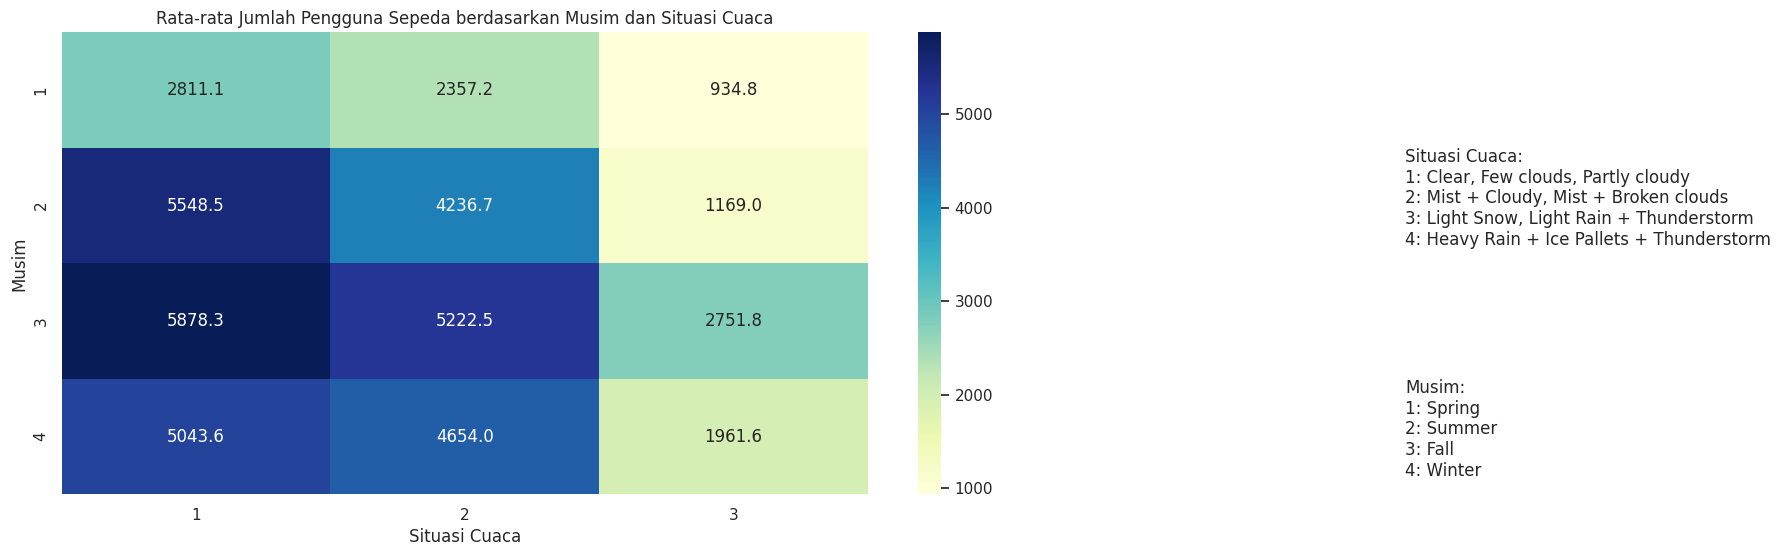

In [46]:
# Mengidentifikasi pola musiman dan cuaca yang mempengaruhi
# rata-rata jumlah pengguna sepeda (cnt_mean) dan total pengguna sepeda (cnt_sum).
# Membuat heatmap untuk melihat variasi rata-rata Jumlah Pengguna Sepeda berdasarkan musim
# dan kondisi cuaca

plt.figure(figsize=(13, 6))
pivot_table = groupby_1.pivot(index="season", columns="weathersit", values="cnt_mean")
ax = sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")

plt.title("Rata-rata Jumlah Pengguna Sepeda berdasarkan Musim dan Situasi Cuaca")

ax.set_xlabel("Situasi Cuaca")
ax.set_ylabel("Musim")

# Tambahkan keterangan untuk season
plt.text(5, 3, "Musim:\n1: Spring\n2: Summer\n3: Fall\n4: Winter",
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Tambahkan keterangan untuk weathersit
plt.text(5, 1, "Situasi Cuaca:\n1: Clear, Few clouds, Partly cloudy\n2: Mist + Cloudy, Mist + Broken clouds\n3: Light Snow, Light Rain + Thunderstorm\n4: Heavy Rain + Ice Pallets + Thunderstorm",
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.show()



Bisa disimpulkan bahwa:
* Rata-rata jumlah pengguna sepeda tertinggi terjadi pada musim semi.
* Rata-rata jumlah pengguna sepeda terendah terjadi pada musim dingin.
* Situasi cuaca dengan "Clear, Few clouds, Partly cloudy" memiliki rata-rata jumlah pengguna sepeda tertinggi.
* Situasi cuaca dengan "Heavy Rain + Ice Pallets + Thunderstorm" memiliki rata-rata jumlah pengguna sepeda terendah.

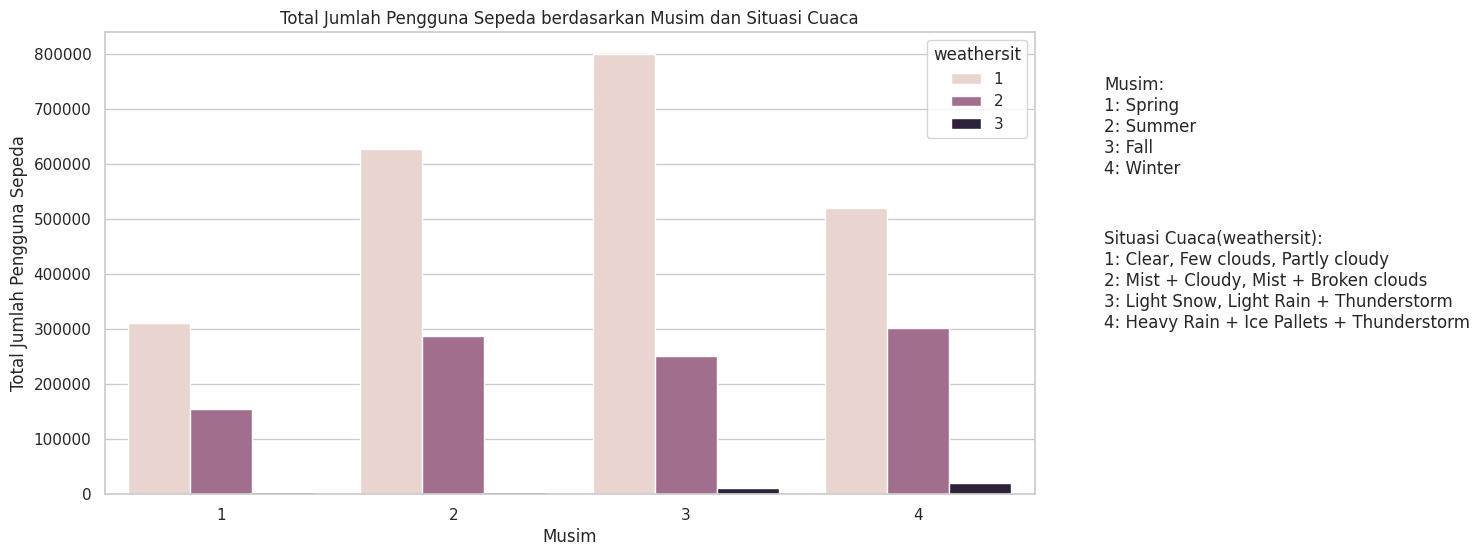

In [75]:
# Bar plot untuk melihat pengaruh musim dan situasi cuaca terhadap total jumlah pengguna sepeda
plt.figure(figsize=(12, 6))
sns.barplot(x="season", y="cnt_sum", hue="weathersit", data=groupby_1)
plt.title("Total Jumlah Pengguna Sepeda berdasarkan Musim dan Situasi Cuaca")
plt.xlabel("Musim")
plt.ylabel("Total Jumlah Pengguna Sepeda")


plt.text(3.8, max(groupby_1["cnt_sum"]) * 0.95, "Musim:\n1: Spring\n2: Summer\n3: Fall\n4: Winter",
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))


plt.text(3.8, max(groupby_1["cnt_sum"]) * 0.60, "Situasi Cuaca(weathersit):\n1: Clear, Few clouds, Partly cloudy\n2: Mist + Cloudy, Mist + Broken clouds\n3: Light Snow, Light Rain + Thunderstorm\n4: Heavy Rain + Ice Pallets + Thunderstorm",
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

Berdasarkan grafik diatas,Jumlah pengguna sepeda paling banyak di musim panas dengan cuaca Cerah, dan paling sedikit pada Musim dingin dengan cuaca Hujan Deras,Butiran Es, Badai Petir.

Langkah selanjutnya menganalisa bagaimana faktor-faktor cuaca seperti
suhu (temp_mean dan atemp_mean), kelembaban (hum_mean),
dan kecepatan angin (windspeed_mean) mempengaruhi
jumlah pengguna sepeda dalam berbagai musim dan situasi cuaca.


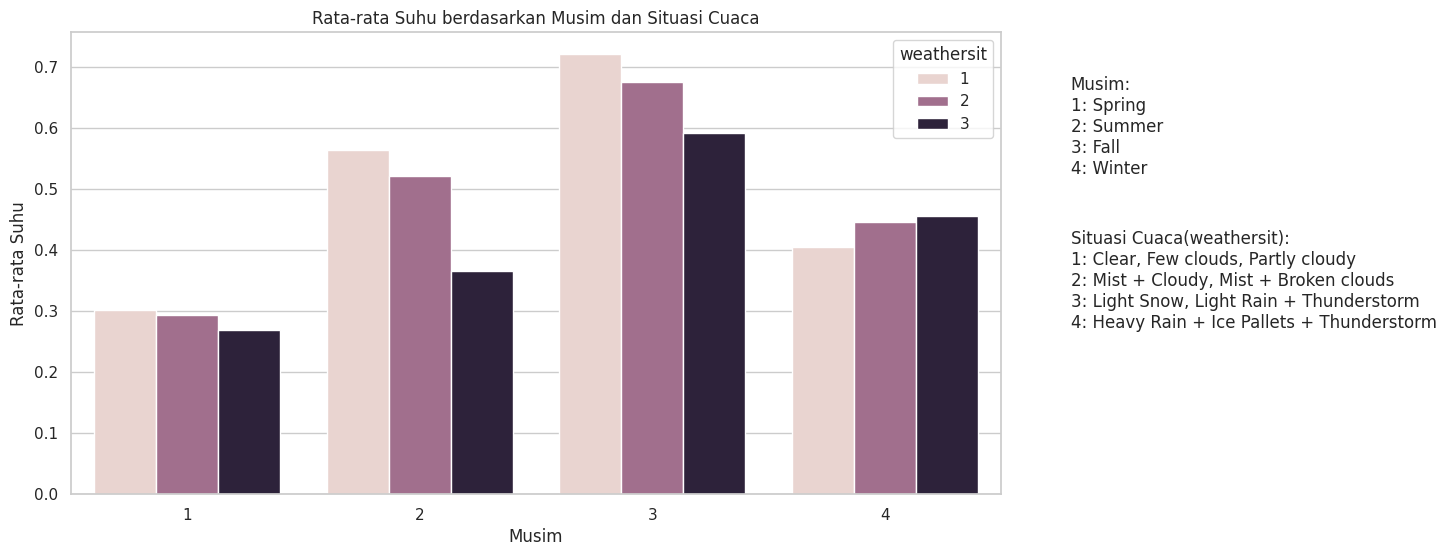

In [74]:
# Analisa Suhu
# Menganalisis bagaimana suhu mempengaruhi
# jumlah pengguna sepeda berdasarkan musim dan kondisi cuaca
# Bar plot untuk melihat pengaruh suhu berdasarkan musim dan situasi cuaca

plt.figure(figsize=(12, 6))
sns.barplot(x="season", y="temp_mean", hue="weathersit", data=groupby_1)
plt.title("Rata-rata Suhu berdasarkan Musim dan Situasi Cuaca")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Suhu")

plt.text(3.8, max(groupby_1["temp_mean"]) * 0.95, "Musim:\n1: Spring\n2: Summer\n3: Fall\n4: Winter",
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))


plt.text(3.8, max(groupby_1["temp_mean"]) * 0.60, "Situasi Cuaca(weathersit):\n1: Clear, Few clouds, Partly cloudy\n2: Mist + Cloudy, Mist + Broken clouds\n3: Light Snow, Light Rain + Thunderstorm\n4: Heavy Rain + Ice Pallets + Thunderstorm",
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.show()


Grafik diatas menunjukkan bahwa rata-rata suhu bervariasi tergantung pada musim dan situasi cuaca

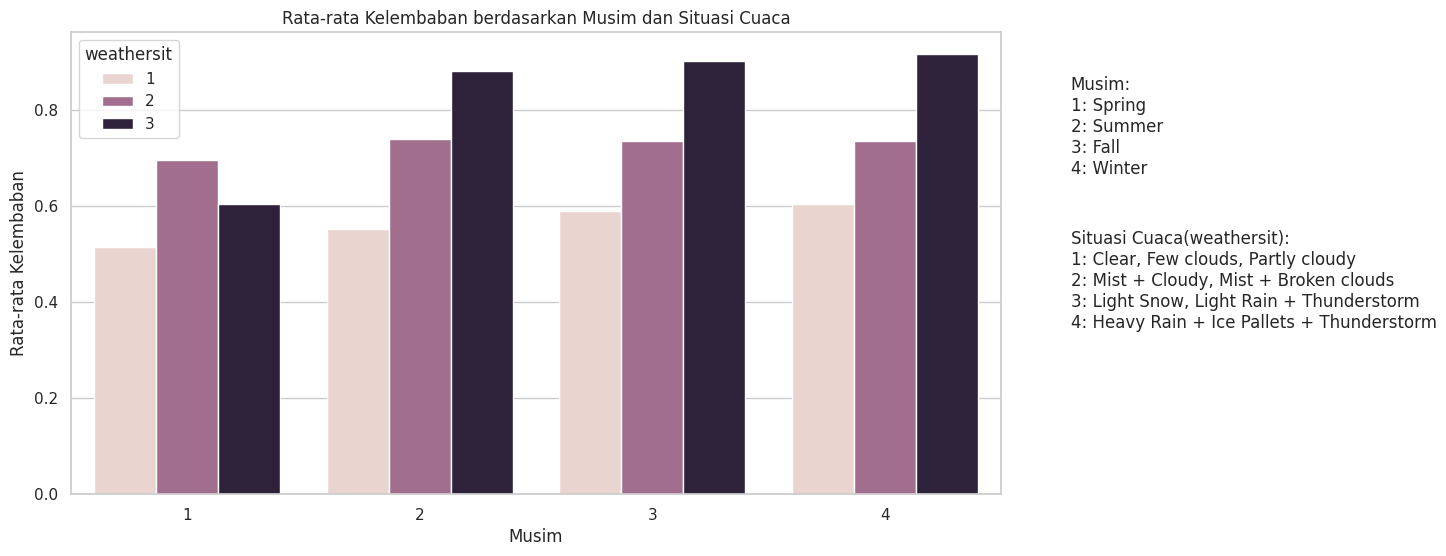

In [77]:
# Analisis Kelembaban
# Menganalisis bagaimana kelembaban mempengaruhi
# jumlah pengguna sepeda berdasarkan musim dan kondisi cuaca.
# Bar plot untuk melihat pengaruh kelembaban berdasarkan musim dan situasi cuaca
plt.figure(figsize=(12, 6))
sns.barplot(x="season", y="hum_mean", hue="weathersit", data=groupby_1)
plt.title("Rata-rata Kelembaban berdasarkan Musim dan Situasi Cuaca")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Kelembaban")
plt.text(3.8, max(groupby_1["hum_mean"]) * 0.95, "Musim:\n1: Spring\n2: Summer\n3: Fall\n4: Winter",
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))


plt.text(3.8, max(groupby_1["hum_mean"]) * 0.60, "Situasi Cuaca(weathersit):\n1: Clear, Few clouds, Partly cloudy\n2: Mist + Cloudy, Mist + Broken clouds\n3: Light Snow, Light Rain + Thunderstorm\n4: Heavy Rain + Ice Pallets + Thunderstorm",
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.show()


Berdasarkan grafik diatas, rata-rata kelembaban udara tertinggi disaat musim dingin diikuti dengan musim panas. Hal ini kemungkinan karena pada musim tersebut, evaporasi air dari permukaan tanah lebih rendah karena suhu udara yang lebih dingin, dan curah hujan yang tinggi

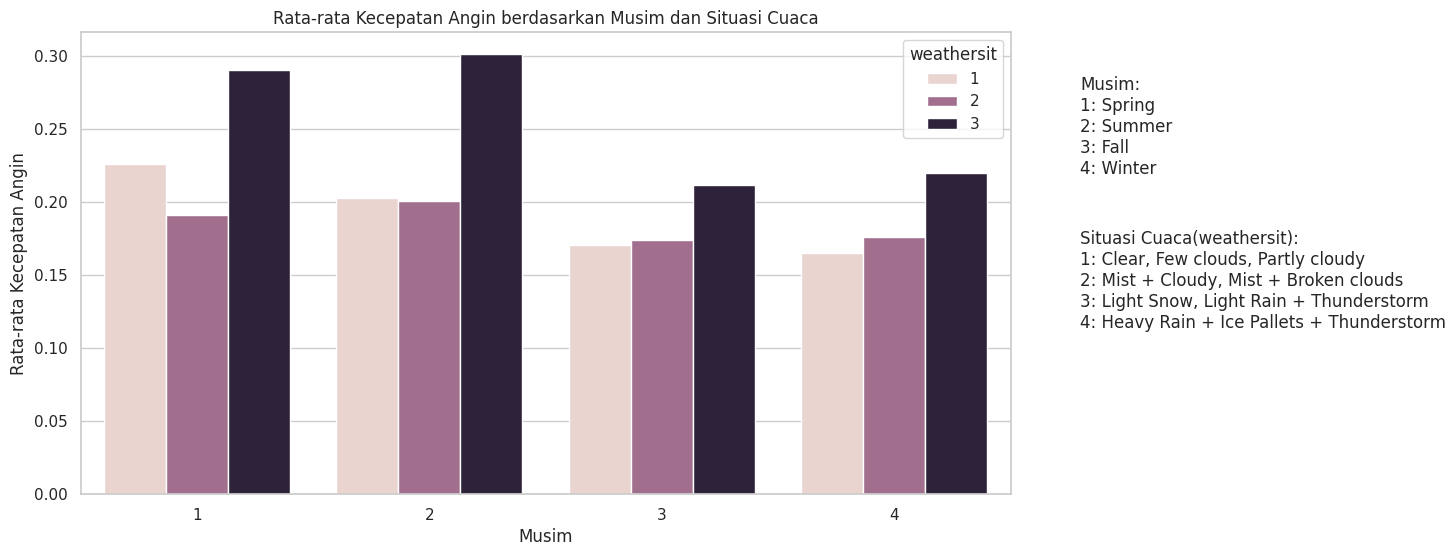

In [79]:
# Analisis Kecepatan Angin
# Menganalisis bagaimana kecepatan angin mempengaruhi jumlah
# pengguna sepeda berdasarkan musim dan kondisi cuaca.
# Bar plot untuk melihat pengaruh kecepatan angin berdasarkan musim dan situasi cuaca
plt.figure(figsize=(12, 6))
sns.barplot(x="season", y="windspeed_mean", hue="weathersit", data=groupby_1)
plt.title("Rata-rata Kecepatan Angin berdasarkan Musim dan Situasi Cuaca")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Kecepatan Angin")

plt.text(3.8, max(groupby_1["windspeed_mean"]) * 0.95, "Musim:\n1: Spring\n2: Summer\n3: Fall\n4: Winter",
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))


plt.text(3.8, max(groupby_1["windspeed_mean"]) * 0.60, "Situasi Cuaca(weathersit):\n1: Clear, Few clouds, Partly cloudy\n2: Mist + Cloudy, Mist + Broken clouds\n3: Light Snow, Light Rain + Thunderstorm\n4: Heavy Rain + Ice Pallets + Thunderstorm",
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.show()


Berdasarkan grafik diatas dapat disimpulkan:
* Rata-rata kecepatan angin tertinggi terjadi pada musim musim semi dan musim gugur.
* Rata-rata kecepatan angin terendah terjadi pada musim musim panas dan musim semi.


#Kesimpulan:

Setelah melakukan analisis di atas, Dapat ditarik beberapa kesimpulan mengenai faktor-faktor utama yang mempengaruhi jumlah pengguna sepeda setiap hari:

* Musim dan Kondisi Cuaca: Rata-rata jumlah pengguna sepeda bervariasi secara signifikan berdasarkan musim dan kondisi cuaca. Misalnya, musim panas mungkin memiliki jumlah pengguna sepeda tertinggi, sementara musim dingin memiliki jumlah pengguna terendah.
* Suhu: Suhu juga memiliki pengaruh signifikan terhadap jumlah pengguna sepeda. Cuaca yang lebih hangat cenderung meningkatkan jumlah pengguna sepeda.
* Kelembaban dan Kecepatan Angin: Kelembaban tinggi dan kecepatan angin yang kuat mungkin mengurangi jumlah pengguna sepeda.<br>

Berdasarkan kesimpulan diatas, perencanaan dan pengelolaan layanan sepeda dapat dilakukan dengan lebih baik, seperti penyediaan lebih banyak sepeda selama musim panas atau perbaikan jalur sepeda untuk menghadapi kondisi cuaca buruk.